<h1 align='center' style='color:purple'> Deep Learning- 課程 12－Deep Learning- Using Pre-Trained Vgg16 Convnets Model
                                - Training New Model - Python Tutorial</h1>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="50%">
<img src="http://image-net.org/index_files/logo.jpg" width="50%">

<img src="https://cdn-images-1.medium.com/max/2000/0*4aHRjVXRKsyUhm2b" width="100%"> 

'''

>> 資料準備

    >> 你我互動學習園地- 進階課程 Advanced Course 
        >> https://interactiveuandmetutorialsac.weebly.com/

    >> 你我互動學習園地
        >> https://interactiveuandmetutorials.weebly.com/
    
    >> Python 程式語言 設計
        >> https://pythonprogrammingtutorials.weebly.com/
 
 


    >> 下載 數據集(貓與狗的圖片集)

        >> https://www.kaggle.com/c/dogs-vs-cats/data 
        
            >> Download 下載 - 圖像資料檔 - training.zip

>> 目錄結構 :

    >> Deep Learning- 課程 12－Deep Learning- Using Pre-Trained Vgg16 Convnets Model - Training New Model  - Image Classification.zip
   

檔案目錄路徑/
    ├── 課程 12－Deep Learning- Using Pre-Trained Vgg16 Convnets Model - Training New Model - Image Classificatin
    └──data/
        └── train/
             ├── cat.0.jpg
             ├── cat.1.jpg
             ├── ..
             └── dog.12499.jpg
               
    
'''   

In [ ]:
'''

>> ImageNet - 下載 數據集 (貓與狗的圖片集)

        >> https://www.kaggle.com/c/dogs-vs-cats/data
        
    >> dogs-vs-cats.zip
        >> 900.6 MB.Zip
            >> sampleSubmission
            >> train.zip
            >> test1.zip
            
            
>> https://www.kaggle.com/c/dogs-vs-cats/data

>> Dogs vs. Cats images
    >> Dogs vs. Cats
        >> Data (812 MB)
        >> sampleSubmission 86.8 KB (88,903 位元組)
            >> 12.5K rows X 2 colummns 
            
        >> test1.zip  25,000 個檔案  (571,133,922 位元組)
        >> train.zip  25,000 個檔案  (571,133,922 位元組)
        
'''

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

# 程式範例

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
ddir

 磁碟區 C 中的磁碟是 OS
 磁碟區序號:  68E3-32FD

 C:\Users\calvi\OneDrive\桌面\ADcourse 的目錄

2019/11/19  下午 04:10    <DIR>          .
2019/11/19  下午 04:10    <DIR>          ..
2019/11/19  下午 12:09    <DIR>          .ipynb_checkpoints
2019/11/19  上午 10:37    <DIR>          Capsul-Modeltrain
2019/11/19  下午 01:32    <DIR>          data
2019/11/19  下午 01:31    <DIR>          dogs-vs-cats
2019/11/19  上午 10:37    <DIR>          images
2019/11/19  上午 10:37    <DIR>          YoLo
               0 個檔案               0 位元組
               8 個目錄   8,111,222,784 位元組可用


In [4]:
import os, shutil

# 專案 - 根目錄路徑
ROOT_DIR = os.getcwd()
print(ROOT_DIR)

# coco 圖像資料 與標註資料 - 的目錄
DATA_PATH = os.path.join(ROOT_DIR, "data")
print(DATA_PATH)

# 原始數據集 - 的路徑
original_dataset_dir = os.path.join(DATA_PATH, "train")
print(original_dataset_dir)

filenames = original_dataset_dir
print(filenames)

C:\Users\calvi\OneDrive\桌面\ADcourse
C:\Users\calvi\OneDrive\桌面\ADcourse\data
C:\Users\calvi\OneDrive\桌面\ADcourse\data\train
C:\Users\calvi\OneDrive\桌面\ADcourse\data\train


In [5]:
import os

print(os.listdir(filenames))
print(len(os.listdir(original_dataset_dir)))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [6]:
print(len(os.listdir(original_dataset_dir)))

25000


In [8]:
import numpy as np
import cv2

In [9]:
from keras.preprocessing.image import load_img

In [22]:
os.getcwd()

'C:\\Users\\calvi\\OneDrive\\桌面\\ADcourse'

In [33]:
import numpy as np
import cv2
# 讀取圖檔


# sample = (' cat.0.jpg')
# sample

img = cv2.imread('cat.3.jpg ')
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(414, 500, 3)


In [35]:
# 以灰階的方式讀取圖檔

img_gray = cv2.imread('img', cv2.IMREAD_GRAYSCALE)

# 顯示圖片
cv2.imshow('My Image', img)

# 按下任意鍵則關閉所有視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
filenames
print(len(filenames))

25000


In [39]:
filenames = os.listdir(r"C:\Users\calvi\OneDrive\桌面\ADcourse\data\train")
filenames = original_dataset_dir
filenames

'C:\\Users\\calvi\\OneDrive\\桌面\\ADcourse\\data\\train'

Populating the interactive namespace from numpy and matplotlib
dog.9628.jpg
<class 'numpy.ndarray'>
(442, 400, 3)


C:\Users\calvi\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


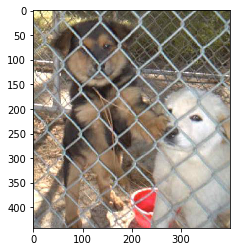

In [40]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filenames = os.listdir(r"C:\Users\calvi\OneDrive\桌面\ADcourse\data\train")
sample = random.choice(filenames)
print(sample)

img=mpimg.imread('../ADcourse/data/train/' + sample)

print(type(img))
print(img.shape)

imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib
25000
cat.8828.jpg
<class 'numpy.ndarray'>
(337, 208, 3)


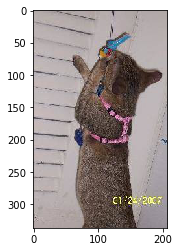

In [41]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filenames = os.listdir(r"C:\Users\calvi\OneDrive\桌面\ADcourse\data\train")
print(len(filenames))
sample = random.choice(filenames)
print(sample)

img=mpimg.imread('../ADcourse/data/train/' + sample)

print(type(img))
print(img.shape)

imgplot = plt.imshow(img)
plt.show()

In [ ]:

>> 數據集 - 狗與貓
    >> Datasets Dogs vs Cats
        下載 數據集 >> https://www.kaggle.com/c/dogs-vs-cats
            >> sampleSubmission.cvs ： 86.8 KB (88,903 位元組)
            >> test1.zip            ： 271 MB (284,321,224 位元組)
            >> train.zip            ： 543 MB (569,546,721 位元組)
    
    
    數據集：狗與貓
            - 二進制分類。對狗和貓進行分類
    
    訓練 集：2萬張   圖像 （10 000張）
    驗證 集：5000張  圖像 （2 500張）
    測試 集：未標記的 圖像（12500張）

    Dataset: Dogs vs Cats
    Description: Binary classification. Classify dogs and cats.
    Training: 20 000 images (10 000 per class)
    Validation: 5 000 images (2 500 per class)
    Testing: 12 500 unlabeled images
    

'''

## Import  相關函式庫

In [42]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

Platform: Windows-10-10.0.18362-SP0
Tensorflow version: 1.14.0
Keras version: 2.2.4


In [43]:
!python -V
platform.python_version()

Python 3.7.3


'3.7.3'

- 模型可視化 
- Install plot_model/ Image
    - pip install graphviz
    - pip install pydot

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

In [45]:
import os, shutil

# 專案 - 根目錄路徑
ROOT_DIR = os.getcwd()

# coco 圖像資料 與標註資料 - 的目錄
DATA_PATH = os.path.join(ROOT_DIR, "data")

# 原始數據集 - 的路徑
original_dataset_dir = os.path.join(DATA_PATH, "train")

# 存儲小數據集 - 的目錄
base_dir = os.path.join(DATA_PATH, "cats_and_dogs_small")
if not os.path.exists(base_dir): 
    os.mkdir(base_dir)

# 訓練資料 - 的目錄
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): 
    os.mkdir(train_dir)

# 驗證資料 - 的目錄
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir): 
    os.mkdir(validation_dir)

# 測試資料 - 的目錄
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)    

# 貓的圖片的訓練 - 資料目錄
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# 狗的圖片的訓練 - 資料目錄
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 貓的圖片的驗證 - 資料目錄
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# 狗的圖片的驗證 - 資料目錄
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# 貓的圖片的測試 - 資料目錄
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# 狗的圖片的測試 - 資料目錄
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
    
# 複製 - 前 1000個貓的圖片 - 到 - train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 cat images to train_cats_dir complete!')

# 複製 - 下 500個貓的圖片 - 到 - validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to validation_cats_dir complete!')

# 複製 - 下 500個貓的圖片 - 到 test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to test_cats_dir complete!')

# 複製 - 前 1000個狗 的圖片 到 - train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 dog images to train_dogs_dir complete!')


# 複製 - 下 500個狗 的圖片 到 - validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 dog images to validation_dogs_dir complete!')

# Copy 複製 下 - 500個狗的圖片 到  - test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
    
print('Copy next 500 dog images to test_dogs_dir complete!')

Copy first 1000 cat images to train_cats_dir complete!
Copy next 500 cat images to validation_cats_dir complete!
Copy next 500 cat images to test_cats_dir complete!
Copy first 1000 dog images to train_dogs_dir complete!
Copy next 500 dog images to validation_dogs_dir complete!
Copy next 500 dog images to test_dogs_dir complete!


In [46]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [47]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [58]:
# print('total validation cat images:', len(os.listdir(val_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [57]:
#print('total validation dog images:', len(os.listdir(val_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [50]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [51]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [55]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


<img src="https://s3.amazonaws.com/book.keras.io/img/ch5/swapping_fc_classifier.png" width="100%">

In [60]:
##time

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,          # Keras - 只需要卷積基底的　權重模型資訊
                  input_shape=(150, 150, 3))  # 宣告  - 要處理的圖像 大小與顏色 通道數

In [61]:
# 顯示 模型資訊
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [62]:
## 特徵提取

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# base_dir = 'data/5_1/cats_and_dogs_small'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255) # 產生一個 - 圖像資料產生器 - 物件

batch_size = 20 # 設定每次產生的圖像的數據批量

# 提取圖像特徵

def extract_features(directory, sample_count):            # 影像的目錄, 要處理的圖像數
    features = np.zeros(shape=(sample_count, 4, 4, 512))  # 根據 VGG16(卷積基底) 最後一層的 - 輪出張量規格
    labels = np.zeros(shape=(sample_count))               # 要處理的 圖像數
    
    # 產生一個 - 圖像資料產生器 - 實例(資料是在檔案目錄中), 每呼叫它一次, 會吐產生出 - 特定批次數的 - 圖像資料
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),  # 設定圖像的 - 高(Height) / 寬(width)
        batch_size=batch_size,   # 設定每次產生的圖像的 - 數據批量 Batch 
        class_mode='binary')     # 因為目標資料集 - 只有兩類 ( Cat & Dog)
    
    # 訓練資料集 - 所有的圖像 - 都 Run 一次
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)                  # 透過 - 卷積基底 - 來淬取 圖像特徵
        features[i * batch_size : (i + 1) * batch_size] = features_batch  # 特徴 - 先存放起來
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch     # 標籤 - 先存放起來
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    
    print('extract_features complete!')
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)                # 訓練資料的 圖像特徵 淬取
validation_features, validation_labels = extract_features(validation_dir, 1000) # 驗證資料的 圖像特徵 淬取
test_features, test_labels = extract_features(test_dir, 1000)                   # 測試資料的 圖像特徵 淬取

Found 2000 images belonging to 2 classes.
extract_features complete!
Found 1000 images belonging to 2 classes.
extract_features complete!
Found 1000 images belonging to 2 classes.
extract_features complete!


In [ ]:
- 提取的特徵 - (樣本數，4，4，512）的形狀
            - 餵給一個　密集連接(Densely-Connected) 分類器
            - 把它們壓扁 (Flatten) - (樣本數, 8192)
           

In [63]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [65]:
%%time

from keras import models
from keras import layers
from keras import optimizers

# 產生一個新的密集連接層 - 來做為分類器

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) # 因為資料集只有兩類 (Cat & Dog)

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

# 透過預處理的卷積基底 - 所提取的特徵 - 做為 Input - 來進行訓練

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6026 - acc: 0.6695 - val_loss: 0.4383 - val_acc: 0.8220
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4269 - acc: 0.8090 - val_loss: 0.3646 - val_acc: 0.8600
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3551 - acc: 0.8470 - val_loss: 0.3307 - val_acc: 0.8620
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3241 - acc: 0.8660 - val_loss: 0.3023 - val_acc: 0.8820
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2867 - acc: 0.8860 - val_loss: 0.2915 - val_acc: 0.8750
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2745 - acc: 0.8890 - val_loss: 0.2758 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2565 - acc: 0.8975 - val_loss: 0.2811 - val_acc: 0.8830
Epoch 8/30
200

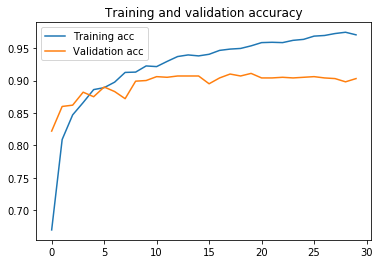

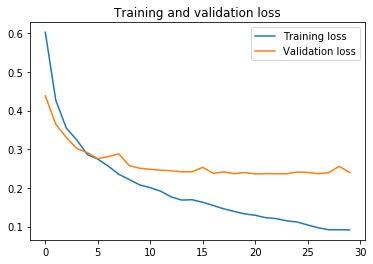

In [66]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [67]:
from keras import models
from keras import layers

model = models.Sequential()                       # 產生一個新的網絡模型結構
model.add(conv_base)                              # 把預訓練的卷積基底疊上去
model.add(layers.Flatten())                       # 打平
model.add(layers.Dense(256, activation='relu'))   # 疊上新的密集連接層來做為分類器
model.add(layers.Dense(1, activation='sigmoid'))  # 因為資料集只有 - 兩類(Cat & Dog)

這是我們現在的模型：

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [69]:
# 凍結前 - 卷積基底 有多少可以被訓練的權重

print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [70]:
# 凍結

conv_base.trainable = False

In [71]:
# 凍結後 - 卷積基底 有多少可以被訓練的權重 

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [72]:
%%time

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 驗證的資料 - 不要進行 資料的增強

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 圖像資料 - 的目錄
        train_dir,
        # 設定圖像的 高( Height ) 與 寬( Width )
        target_size=(150, 150),
        batch_size=20,
        # 因為 - 目標資料集只有兩類(cat & dog)
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 181s - loss: 0.6133 - acc: 0.6700 - val_loss: 0.4690 - val_acc: 0.8200
Epoch 2/30
 - 178s - loss: 0.4963 - acc: 0.7770 - val_loss: 0.3851 - val_acc: 0.8430
Epoch 3/30
 - 179s - loss: 0.4362 - acc: 0.8190 - val_loss: 0.3390 - val_acc: 0.8580
Epoch 4/30
 - 179s - loss: 0.4039 - acc: 0.8270 - val_loss: 0.3096 - val_acc: 0.8760
Epoch 5/30
 - 178s - loss: 0.3895 - acc: 0.8270 - val_loss: 0.2965 - val_acc: 0.8750
Epoch 6/30
 - 179s - loss: 0.3712 - acc: 0.8320 - val_loss: 0.2925 - val_acc: 0.8700
Epoch 7/30
 - 179s - loss: 0.3614 - acc: 0.8410 - val_loss: 0.2754 - val_acc: 0.8880
Epoch 8/30
 - 179s - loss: 0.3536 - acc: 0.8435 - val_loss: 0.2694 - val_acc: 0.8870
Epoch 9/30
 - 179s - loss: 0.3517 - acc: 0.8485 - val_loss: 0.2632 - val_acc: 0.8860
Epoch 10/30
 - 178s - loss: 0.3328 - acc: 0.8545 - val_loss: 0.2632 - val_acc: 0.8860
Epoch 11/30
 - 179s - loss: 0.3361 - acc: 0.8605 - val_loss: 0.25

In [73]:
# 模型 儲存 Model Save 

model.save('cats_and_dogs_small_3.h5') 

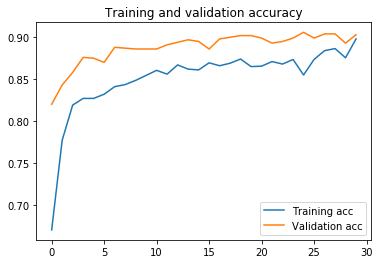

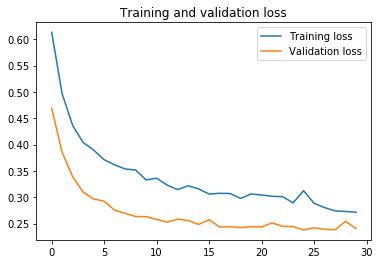

In [74]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<img src="https://s3.amazonaws.com/book.keras.io/img/ch5/vgg16_fine_tuning.png" width="50%">

In [75]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [76]:
conv_base.trainable = True # 解凍 "卷積基底"

# 所有層 - 直到 block4_pool - 都應該被凍結，而 block5_conv1，block5_conv2, block5_conv3 及 block5_pool- 被解凍 

layers_frozen = ['block5_conv1','block5_conv2', 'block5_conv3', 'block5_pool']
for layer in conv_base.layers:
    if layer.name in layers_frozen:
        layer.trainable = True
    else:
        layer.trainable = False
        
# 每一層是否可以被 - trainable - 的 flat - 列印出來

for layer in conv_base.layers:
    print("{}: {}".format(layer.name, layer.trainable))        


input_2: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: True
block5_conv2: True
block5_conv3: True
block5_pool: True


In [77]:
%%time
# 微調

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5), # 小的 learning Rate
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 209s 2s/step - loss: 0.2776 - acc: 0.8870 - val_loss: 0.2614 - val_acc: 0.8900
Epoch 2/100
100/100 [==============================] - 209s 2s/step - loss: 0.2703 - acc: 0.8850 - val_loss: 0.2123 - val_acc: 0.9150
Epoch 3/100
100/100 [==============================] - 209s 2s/step - loss: 0.2356 - acc: 0.9015 - val_loss: 0.2167 - val_acc: 0.9100
Epoch 4/100
100/100 [==============================] - 209s 2s/step - loss: 0.2172 - acc: 0.9010 - val_loss: 0.1958 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 208s 2s/step - loss: 0.2002 - acc: 0.9210 - val_loss: 0.2884 - val_acc: 0.8860
Epoch 6/100
100/100 [==============================] - 208s 2s/step - loss: 0.1974 - acc: 0.9115 - val_loss: 0.2245 - val_acc: 0.9210
Epoch 7/100
100/100 [==============================] - 208s 2s/step - loss: 0.1946 - acc: 0.9205 - val_loss: 0.1779 - val_acc: 0.9320
Epoch 8/100
100/100 [==============================] - 209s 2s

100/100 [==============================] - 209s 2s/step - loss: 0.0364 - acc: 0.9890 - val_loss: 0.2410 - val_acc: 0.9320
Epoch 62/100
100/100 [==============================] - 210s 2s/step - loss: 0.0355 - acc: 0.9885 - val_loss: 0.2666 - val_acc: 0.9320
Epoch 63/100
100/100 [==============================] - 210s 2s/step - loss: 0.0427 - acc: 0.9835 - val_loss: 0.2097 - val_acc: 0.9460
Epoch 64/100
100/100 [==============================] - 209s 2s/step - loss: 0.0294 - acc: 0.9885 - val_loss: 0.2422 - val_acc: 0.9280
Epoch 65/100
100/100 [==============================] - 219s 2s/step - loss: 0.0300 - acc: 0.9910 - val_loss: 0.2556 - val_acc: 0.9310
Epoch 66/100
100/100 [==============================] - 221s 2s/step - loss: 0.0218 - acc: 0.9920 - val_loss: 0.2640 - val_acc: 0.9440
Epoch 67/100
100/100 [==============================] - 224s 2s/step - loss: 0.0302 - acc: 0.9900 - val_loss: 0.2554 - val_acc: 0.9410
Epoch 68/100
100/100 [==============================] - 219s 2s/step

In [79]:
model.save('cats_and_dogs_small_4.h5')

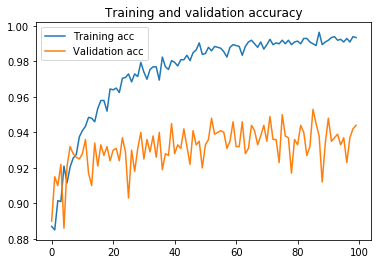

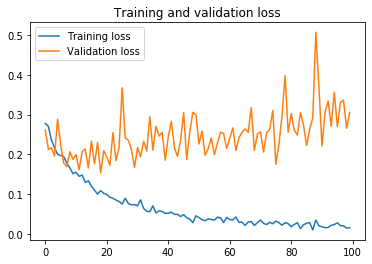

In [80]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

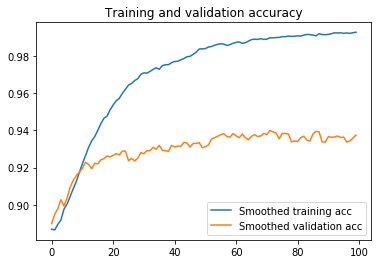

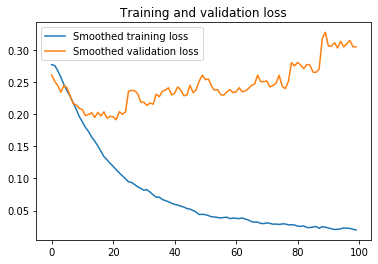

In [81]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [82]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9349999916553497


參考文獻
    
* [fchollet: deep-learning-with-python-notebooks (原文)](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb)
* [Keras官網](http://keras.io/)

MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.